## **i. Mount google drive**
---

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [34]:
import cv2
import sys
import os
import scipy
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print("Versions of key libraries")
print("---")
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("pandas:    ", pd.__version__)
print("scipy:     ", scipy.__version__)

Versions of key libraries
---
numpy:      1.19.5
matplotlib: 3.2.2
pandas:     1.1.5
scipy:      1.4.1


## **iii. Append /iss/issm/data/ in your python path**
---

In [35]:
sys.path.append('/content/gdrive/My Drive/iss/issm/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/issm/data/',
 '/content/gdrive/My Drive/iss/issm/data/',
 '/content/gdrive/My Drive/iss/issm/data/',
 '/content/gdrive/My Drive/iss/issm/data/']

## **iv. Change working directory to /iss/issm/data/**
---

In [36]:
os.chdir('/content/gdrive/My Drive/iss/issm/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/issm/data'

## **v. Setup matplotlib**
---

In [37]:
plt.style.use('ggplot')                   # if want to use the default style, set 'classic'
print("Matplotlib setup completes.")

Matplotlib setup completes.


## **1. Part 1: Perform peak detection**
---
* Step 1: Read in the ecg signals
* Step 2: Perform peak detection
* Step 3: Display detected peaks

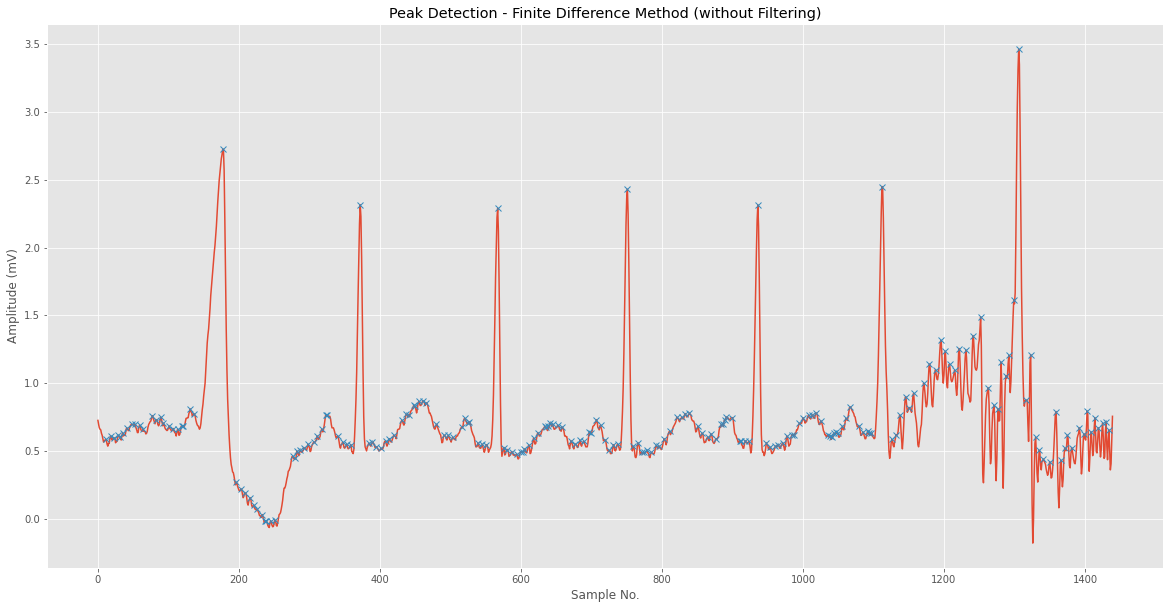

In [38]:
# Step 1: Read in the ecg signals
signal = pd.read_csv('ecg2D.csv',header=None)[1].values

# Step 2: Perform peak detection
from scipy.signal import find_peaks as findPeaks
(Pks,_) = findPeaks(signal)


# Step 3: Display detected peaks
def plot(signal, Pks,title):
  plt.figure(figsize=(20,10))
  plt.xlabel('Sample No.')
  plt.ylabel('Amplitude (mV)')
  plt.title('Peak Detection - Finite Difference Method '+title)
  plt.plot(signal)
  plt.plot(Pks,signal[Pks],'x')

plot(signal,Pks,'(without Filtering)')

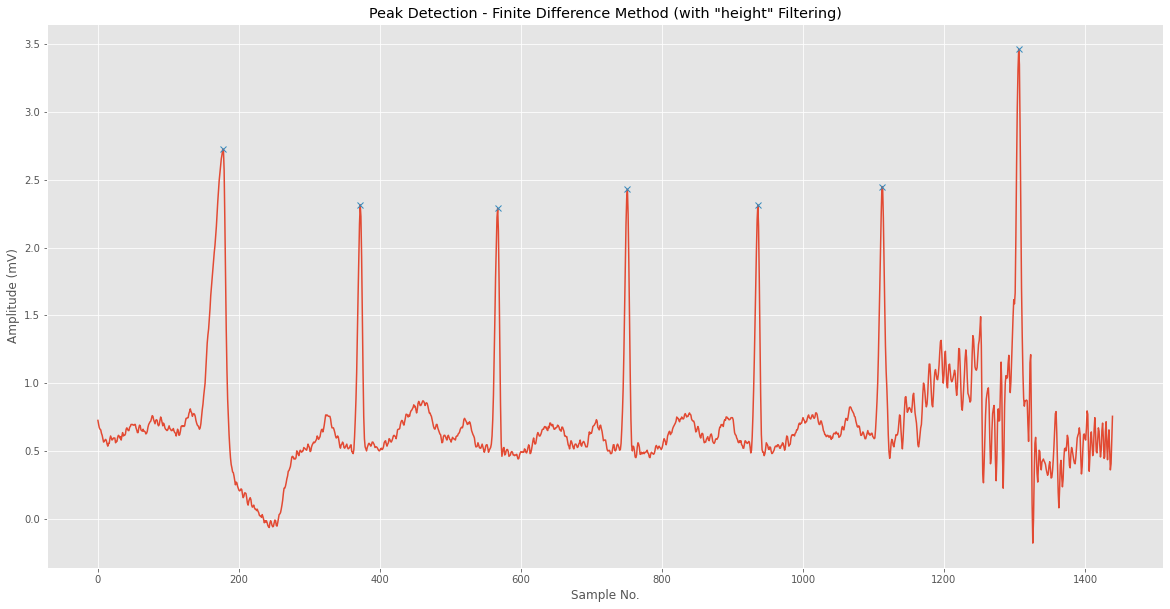

In [39]:
(Pks,_) = findPeaks(signal, height=2)
plot(signal,Pks,'(with "height" Filtering)')

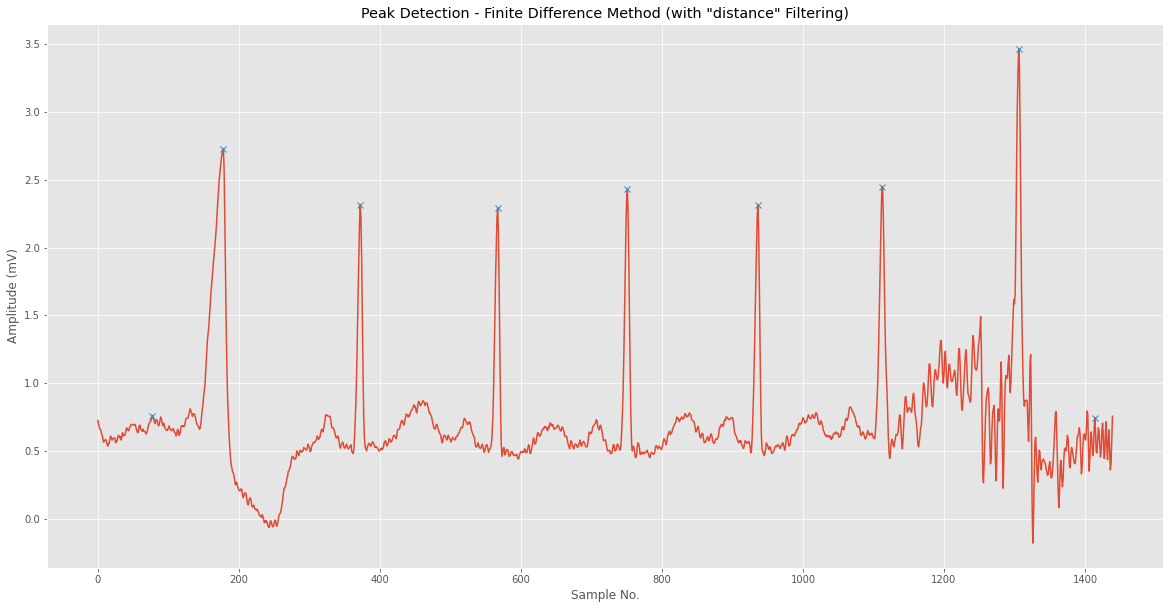

In [40]:
(Pks,_) = findPeaks(signal, distance=100)
plot(signal,Pks,'(with "distance" Filtering)')

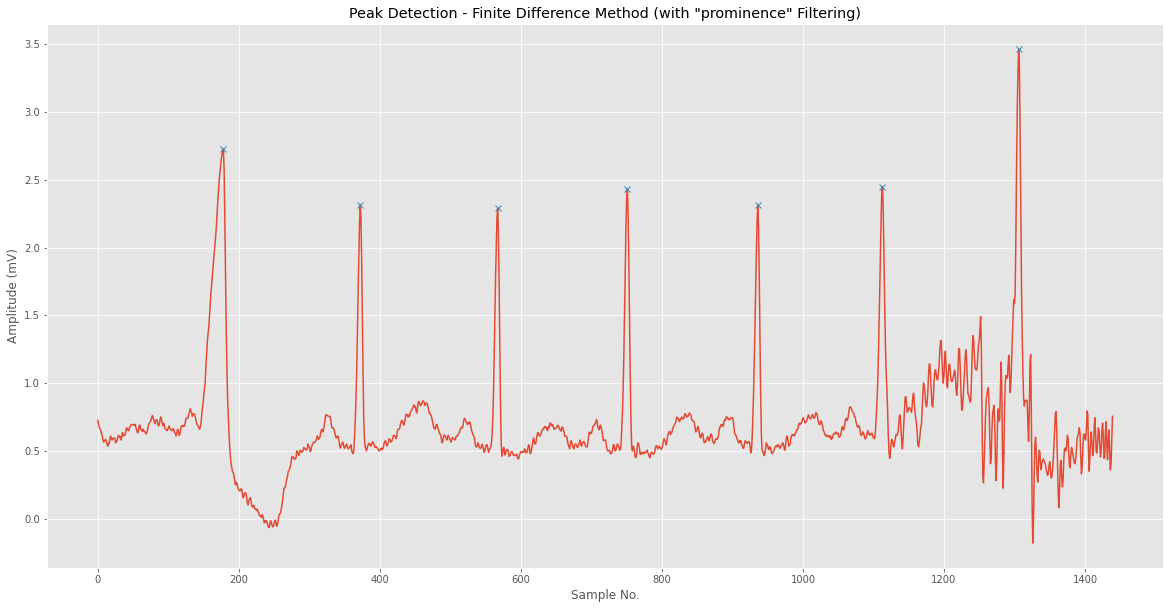

In [41]:
(Pks,_) = findPeaks(signal, prominence=1.2)
plot(signal,Pks,'(with "prominence" Filtering)')

## **Part 2: Baseline correction**
---
* Step 1: Create the baseline correction function
* Step 2: Perform baseline correction
* Step 3: Display the output

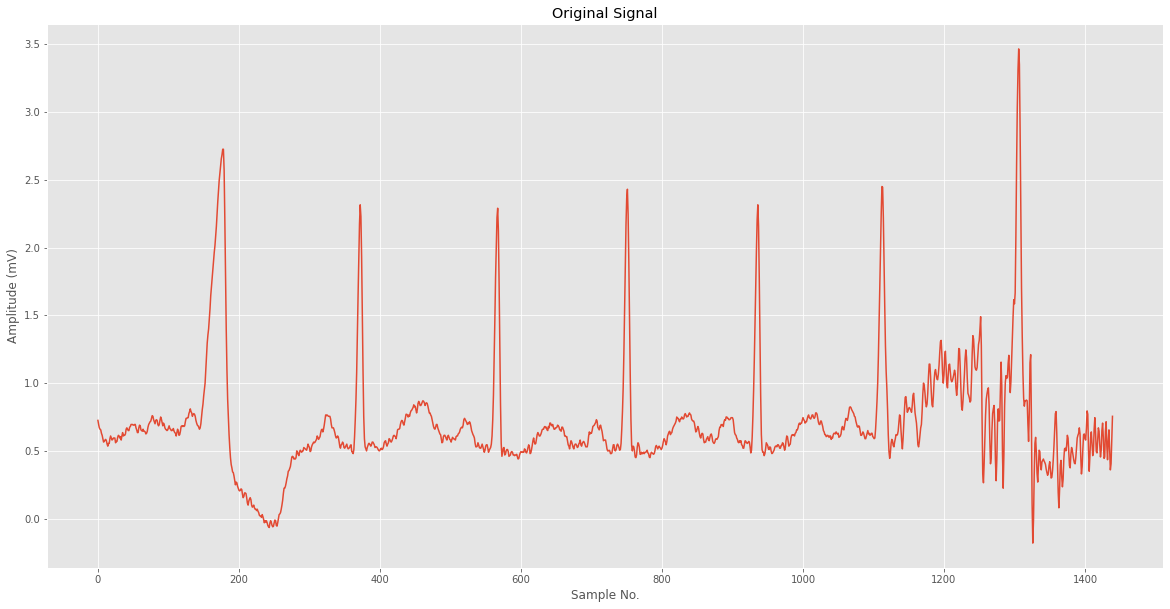

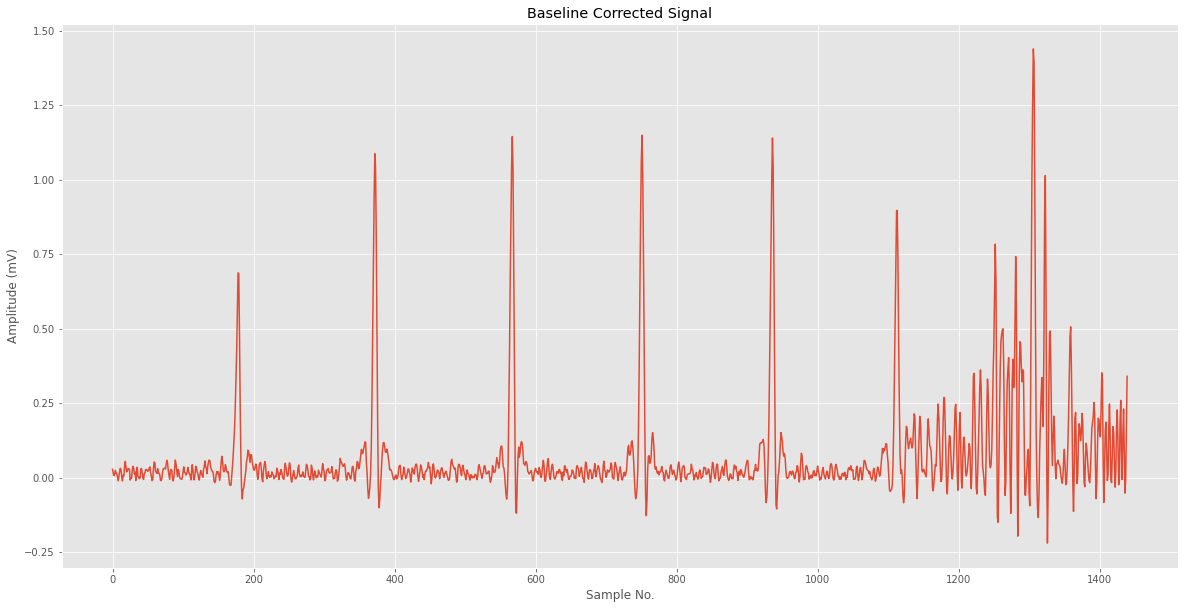

In [42]:
# Step 1: Create the baseline correction function (Calculate z)
from scipy import sparse
from scipy.sparse.linalg import spsolve

def alsbase(y, lamda, p, niter=10):
  L = len(y)
  D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
  w = np.ones(L)

  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lamda * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)

  return z

# Step 2: Perform baseline correction
z = alsbase(signal, lamda=10^5, p=0.05, niter=5)
new_signal = signal - z

# Step 3: Display the output
plt.figure(figsize=(20,10))
plt.xlabel('Sample No.')
plt.ylabel('Amplitude (mV)')
plt.title('Original Signal')
plt.plot(signal)

plt.figure(figsize=(20,10))
plt.xlabel('Sample No.')
plt.ylabel('Amplitude (mV)')
plt.title('Baseline Corrected Signal')
plt.plot(new_signal)